# What factors increase one's survival likelihood in the Titanic

In [6]:
# Import libraries
import sklearn 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

## Download data

In [15]:
import os
data_dir = '/Users/kenlam/Desktop/Data science/ML projects/project 6/titanic/train.csv'
train_df = pd.read_csv(data_dir)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now that we have our data loaded in, let's explore each feature

## Data exploration

### Survived

In [29]:
df = train_df.copy()
aggregated_df = df.groupby(['Survived'])['PassengerId'].count()

Out of a total of 891 passengers, 549 did not survived while 342 survived.

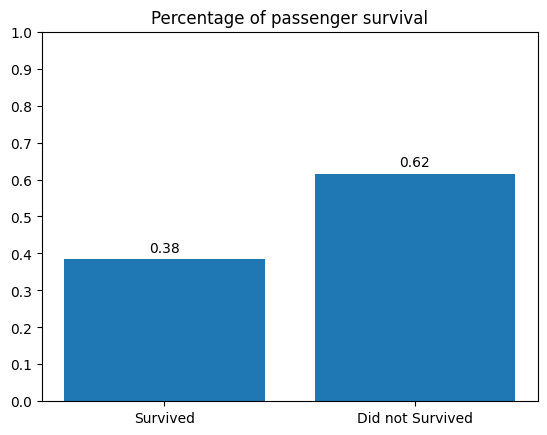

In [73]:
total_passengers = aggregated_df[0] + aggregated_df[1]
x = ['Survived', 'Did not Survived']
y = [aggregated_df[1]/ total_passengers, aggregated_df[0]/total_passengers]

bars = plt.bar(x, y)
plt.title("Percentage of passenger survival")
plt.yticks(np.arange(0.0, 1.1, 0.1))
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()
plt.show()

In our bar chart, 38% of the passengers survived while 62% did not survived.

In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
groupby_gender = df.groupby('Survived')['Sex'].value_counts()

In [84]:
groupby_gender.head()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

In [94]:
not_survived = groupby_gender[0]
survived = groupby_gender[1]

In [101]:
percentage_not_survived = (not_survived / not_survived.sum())
percentage_survived = (survived / survived.sum())

In [102]:
print("Those who did not survived")
print(percentage_not_survived)

print("Those who did survive")
print(percentage_survived)

Those who did not survived
Sex
male      0.852459
female    0.147541
Name: count, dtype: float64
Those who did survive
Sex
female    0.681287
male      0.318713
Name: count, dtype: float64


Of those who survived, 68% were females and 32% were males.
Of those who did not survived, 85% were males and 15% were males.
This makes sense because in emergency situations, females were more likely than males to be evacuated and prioritized first.